In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

# Loard Dataset

In [46]:
df = pd.read_csv('./Data/raw/student_depression_dataset.csv')

In [47]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [49]:
df.shape

(27901, 18)

In [50]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [51]:
#Finding duplicate columns
df.loc[df.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


### Create a copy of the DataFrame

In [52]:
#create a copy of the DataFrame
# and add the last row of the original data again as a new row in the copied dataset
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

In [53]:
#Finding duplicate columns in the copied DataFrame
df_copy.loc[df_copy.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [54]:
#Shows the last 5 rows of the copied dataset
df_copy.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


# Data Cleaning & Preprocessing

### Convert and Clean Data Type

Convert 'Depression' to integer, because this column might contain "0" and "1" as strings.

In [55]:
df['Depression'] = df['Depression'].astype(int)
df['Depression'].dtypes

dtype('int64')

Convert columns that should be categorical (labels or categories).

In [56]:
cat_cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [57]:
# Find columns with data type 'category'.
cat_cols = df.select_dtypes(include=['category']).columns

# Print the number of categorical columns out of the total number of columns.
print("Number of categorical columns:", len(cat_cols), "Out of", len(df.columns))

# Print the names of categorical columns
print("Categorical column names:")
print(cat_cols.tolist())


Number of categorical columns: 7 Out of 18
Categorical column names:
['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']



Check unique values in some important columns to decide cleaning strategy

In [58]:


def value_counts(series):
	return series.value_counts().to_string()

# Prints the unique values in the categorical columns.
print(f"\n Data type of sleep duration:", df['Sleep Duration'].dtype, "\n")
print(value_counts(df['Sleep Duration']))
print(f"\n Data type of financial stress:", df['Financial Stress'].dtype, "\n")
print(value_counts(df['Financial Stress']))




 Data type of sleep duration: object 

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18

 Data type of financial stress: object 

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3


Replace 'Other', '?' like misleading values with NaN

In [59]:

df['Sleep Duration'] = df['Sleep Duration'].replace(['Other', '?'], np.nan)
df['Financial Stress'] = df['Financial Stress'].replace(['Other', '?'], np.nan)

Extract the range (like 5–6) in sleep duration and calculate the average

In [60]:
def clean_sleep_range(s):
    # Use regex to find all numbers (integers or decimals)
    numbers = re.findall(r"\d+\.?\d*", str(s))
    
    # If two numbers found (like '5-6'), calculate their average
    if len(numbers) == 2:
        return (float(numbers[0]) + float(numbers[1])) / 2
    
    # If only one number (like '6 hours'), return it as float
    elif len(numbers) == 1:
        return float(numbers[0])
    
    # If nothing matched, return NaN
    return np.nan

# Apply to the column
df["Sleep Duration"] = df["Sleep Duration"].apply(clean_sleep_range)

print(f"\n Data type of sleep duration:", df['Sleep Duration'].dtype, "\n")
print(value_counts(df['Sleep Duration']))


 Data type of sleep duration: float64 

Sleep Duration
5.0    8310
7.5    7346
5.5    6183
8.0    6044


Convert Financial Stress into numerical data type

In [61]:

df['Financial Stress'] = df['Financial Stress'].astype('float')
df['Financial Stress'].dtypes


dtype('float64')

Check the number of numerical columns out of the total number of columns.

In [62]:
numerical_cols = df.select_dtypes(include='number').columns
print("Numerical columns:")
print(numerical_cols.tolist())
num_numerical = len(numerical_cols)
print("Number of numerical columns:", num_numerical, "Out of", len(df.columns))

Numerical columns:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression']
Number of numerical columns: 11 Out of 18


Check for misleading values in all other features unrelated to the analysis

In [63]:

# For categorical columns
for col in cat_cols:
    print(f"Unique values in '{col}':\n", df[col].unique())
    # Replace common misleading values
    # df[col] = df[col].replace(['?', 'Other','Others', 'N/A', 'NA', '', 'nan'], np.nan)

# For numerical columns
for col in numerical_cols:
    print(f"Unique values in '{col}':\n", df[col].unique())
    # Replace common misleading values
    # df[col] = df[col].replace(['?', 'Other','Others', 'N/A', 'NA', '', 'nan'], np.nan)

Unique values in 'Gender':
 ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Unique values in 'City':
 ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', ..., 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad']
Length: 52
Categories (52, object): [''Less Delhi'', ''Less than 5 Kalyan'', '3.0', 'Agra', ..., 'Vadodara', 'Varanasi', 'Vasai-Virar', 'Visakhapatnam']
Unique values in 'Profession':
 ['Student', ''Civil Engineer'', 'Architect', ''UX/UI Designer'', ''Digital Marketer'', ..., 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur', 'Pharmacist']
Length: 14
Categories (14, object): [''Civil Engineer'', ''Content Writer'', ''Digital Marketer'', ''Educational Consultant'', ..., 'Manager', 'Pharmacist', 'Student', 'Teacher']
Unique values in 'Dietary Habits':
 ['Healthy', 'Moderate', 'Unhealthy', 'Others']
Categories (4, object): ['Healthy', 'Moderate', 'Others', 'Unhealthy']
Unique values in 'Degree':
 ['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', ..., 'B.Tech', 'BBA', '

Replace unrelated 'Others' in Dietary Habits using NaN.

In [64]:
df['Dietary Habits'] = df['Dietary Habits'].replace(['Others'], np.nan)
print(f"Unique values in '{'Dietary Habits'}':\n", df['Dietary Habits'].unique())

Unique values in 'Dietary Habits':
 ['Healthy', 'Moderate', 'Unhealthy', NaN]
Categories (3, object): ['Healthy', 'Moderate', 'Unhealthy']


### Check for missing values

In [65]:
# Display missing values per column

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64


Missing values of numerical features replace with median.

In [66]:
#If there are missing values, fill them with the median
for col in ['Sleep Duration']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in ['Financial Stress']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)        

In [67]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                            0
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


If the precentage of missing values in categorical features < 5%, drop the rows.

In [68]:
# Count how many rows have at least one missing value
missing_row_count = df.isnull().any(axis=1).sum()

# Get total number of rows
total_rows = len(df)

# Calculate the percentage
missing_percentage = (missing_row_count / total_rows) * 100

print(f"Missing rows: {missing_row_count} out of {total_rows} ({missing_percentage:.2f}%)")


Missing rows: 12 out of 27901 (0.04%)


In [69]:
df.dropna(inplace=True)


In [70]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

print("\n After dropping rows with missing values, the dataset now has", df.shape[0], "rows and", df.shape[1], "columns.") 

Missing values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

 After dropping rows with missing values, the dataset now has 27889 rows and 18 columns.


### Dropping irrelevant columns

'id' column is droped because it has the unique value set and not relevant to the  analysis part.

In [71]:
print(df['id'].values)
df.drop(columns=['id'], inplace=True)


[     2      8     26 ... 140689 140690 140699]


Drop the 'City' column because we are going to train the model for generalization and city-specific information may not be relevant for common usage.

In [72]:
df.drop(columns=['City'], inplace=True, errors='ignore')

## Exploratory Data Analysis

### Overall Distribution of the target variable 'Depression'

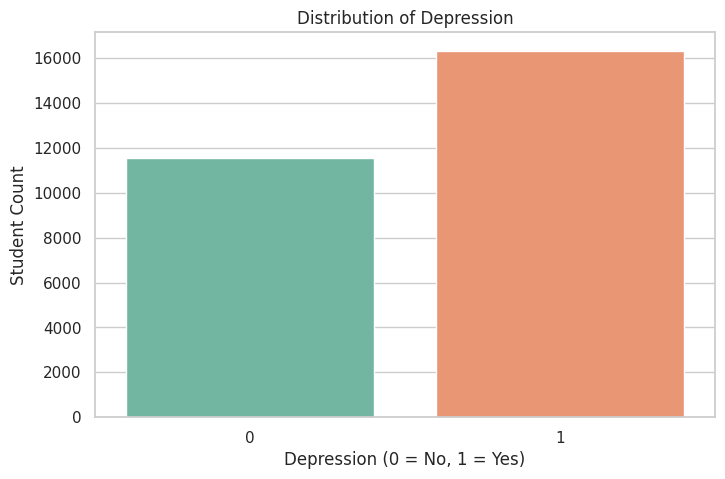

In [73]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', data=df, palette="Set2")
plt.title("Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Student Count")
plt.show()

### Visual Analysis of Depression Distribution Across Categorical Features

In [74]:
print("Categorical features:")
for col in df.select_dtypes(include=['category']).columns:
    print(col)

Categorical features:
Gender
Profession
Dietary Habits
Degree
Have you ever had suicidal thoughts ?
Family History of Mental Illness


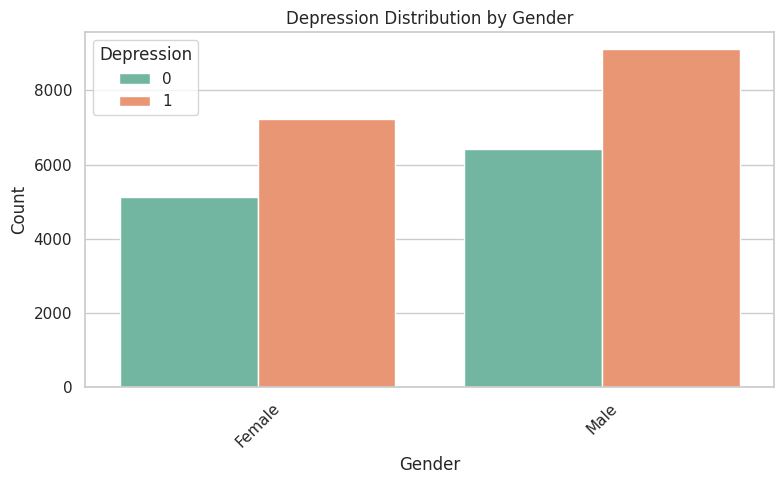

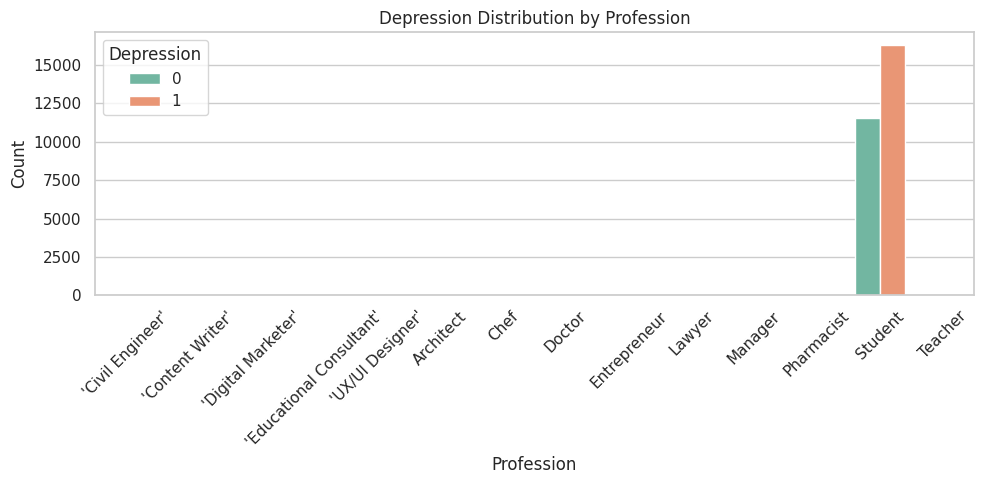

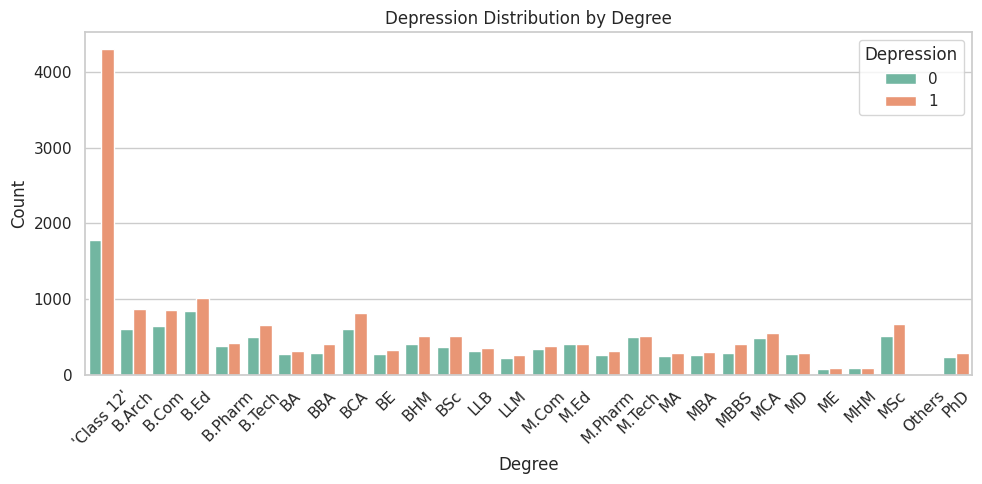

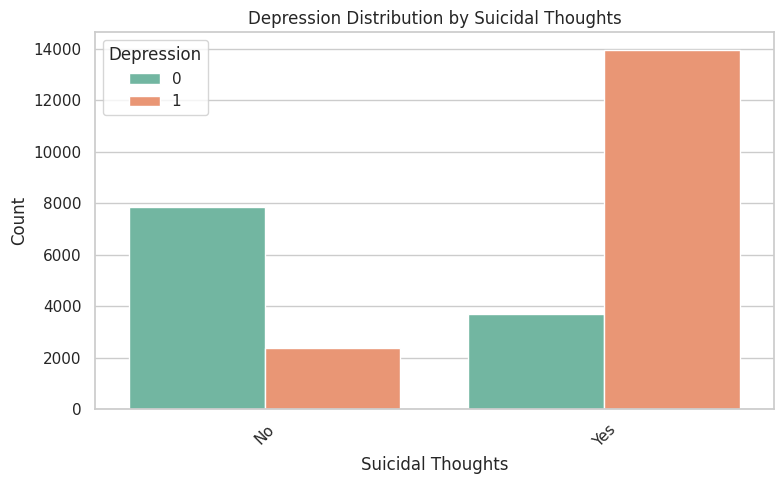

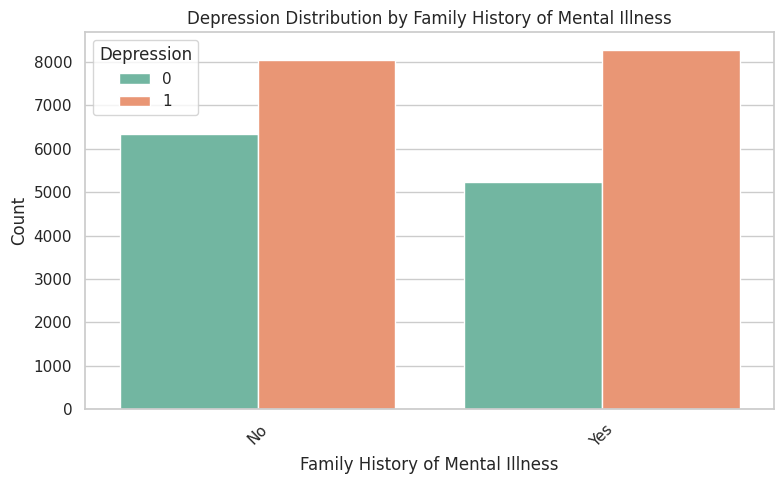

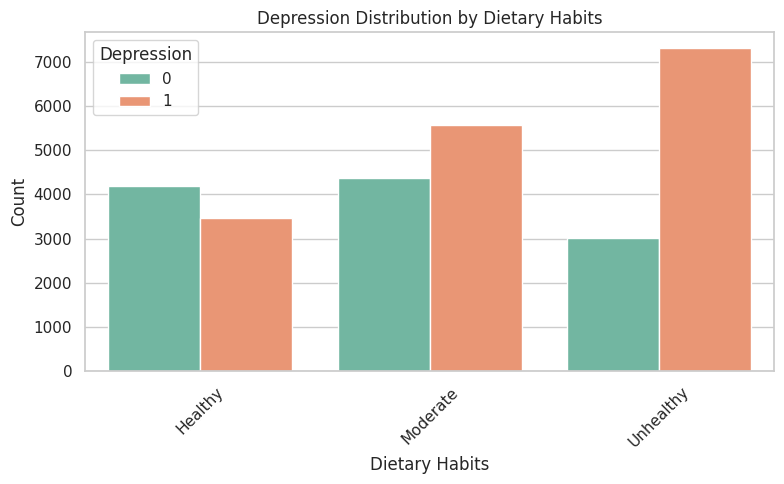

In [75]:
#Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.tight_layout()

#Profession
plt.figure(figsize=(10, 5))
sns.countplot(x='Profession', hue='Depression', data=df, palette="Set2")                
plt.title("Depression Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.tight_layout()

#Degree
plt.figure(figsize=(10, 5))
sns.countplot(x='Degree', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Degree")
plt.xlabel("Degree")
plt.ylabel("Count") 
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()

#Suicidal Thoughts
plt.figure(figsize=(8, 5))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Suicidal Thoughts")       
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()

#Family History of Mental Illness
plt.figure(figsize=(8, 5))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Family History of Mental Illness")    
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()  


#Dietary Habits
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

**Gender vs Depression:** 
Males shows higher depression rate than females. Males have more depression cases (~9,000) compared to non-depression cases (~6,500). Females have roughly balanced numbers between depression and non-depression.

**Profession vs Depresion:**
Depression only visible in students. All other profession show no visible deression bars. Highly skewed to the right.

**Degree vs Depression:**
Class 12 students show highest depression numbers. Most degree categories show relatively low depression cases. The data is heavily skewed toward Class 12 students. 

**Suicidal Thoughtd vs Depression:** 
Shows extremely strong relationship with depression. People with suicidal thoughts have much higher depression rates (~14,000 depression vs ~3,500 no depression).

**Family History vs Depression:**
Family history increase depression risk. People with family history of mental illness have higher depression rates.

**Dietary Habits vs Depression:**
Unhealthy diet linked to more depression. Healthy diet, more non - depressed people.



#### Drop the highly skewed columns

In [76]:

# Profession value counts anaysis
print( 'Value counts for Profession: \n')
print(df['Profession'].value_counts(dropna=False))

Value counts for Profession: 

Profession
Student                     27858
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Pharmacist                      2
Doctor                          2
'Civil Engineer'                1
'Educational Consultant'        1
'UX/UI Designer'                1
Entrepreneur                    1
Lawyer                          1
Manager                         1
Name: count, dtype: int64


In [77]:
# Summary of value counts for better readability
print('Summery of value counts Profession:')

student_count = df[df['Profession'] == 'Student'].shape[0]
print(f"Student count: {student_count}")

non_student_count = df.shape[0] - student_count
print(f"Other count: {non_student_count} ({(non_student_count/df.shape[0])*100:.2f}%)")

Summery of value counts Profession:
Student count: 27858
Other count: 31 (0.11%)


#### Drop rows where Profession is not 'Student'

In [78]:

df = df[df['Profession'] == 'Student']

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

print("Remaining professions:", df['Profession'].unique())
print("Shape of dataset:", df.shape)


Remaining professions: ['Student']
Categories (14, object): [''Civil Engineer'', ''Content Writer'', ''Digital Marketer'', ''Educational Consultant'', ..., 'Manager', 'Pharmacist', 'Student', 'Teacher']
Shape of dataset: (27858, 16)


**Why dropping Profession column?**
Because it only contains 'Student' and has no variability

In [79]:
df.drop(['Profession'], axis=1, inplace=True)
print("Categorical features:")
for col in df.select_dtypes(include=['category']).columns:
    print(col)

print("Shape of the dataset after dropping 'Profession' column:")
df.shape

Categorical features:
Gender
Dietary Habits
Degree
Have you ever had suicidal thoughts ?
Family History of Mental Illness
Shape of the dataset after dropping 'Profession' column:


(27858, 15)

#### Rename 'Work/Study Hours' to 'Study Hours'
Because now we have only the Students.

In [80]:

df.rename(columns={'Work/Study Hours': 'Study Hours'}, inplace=True)
print(df.columns)


Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Study Hours', 'Financial Stress', 'Family History of Mental Illness',
       'Depression'],
      dtype='object')


### Distribution of Numerical Features

In [81]:
print("Numarical features:")
for col in df.select_dtypes(include=['number']).columns:
    print(col)

Numarical features:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Sleep Duration
Study Hours
Financial Stress
Depression


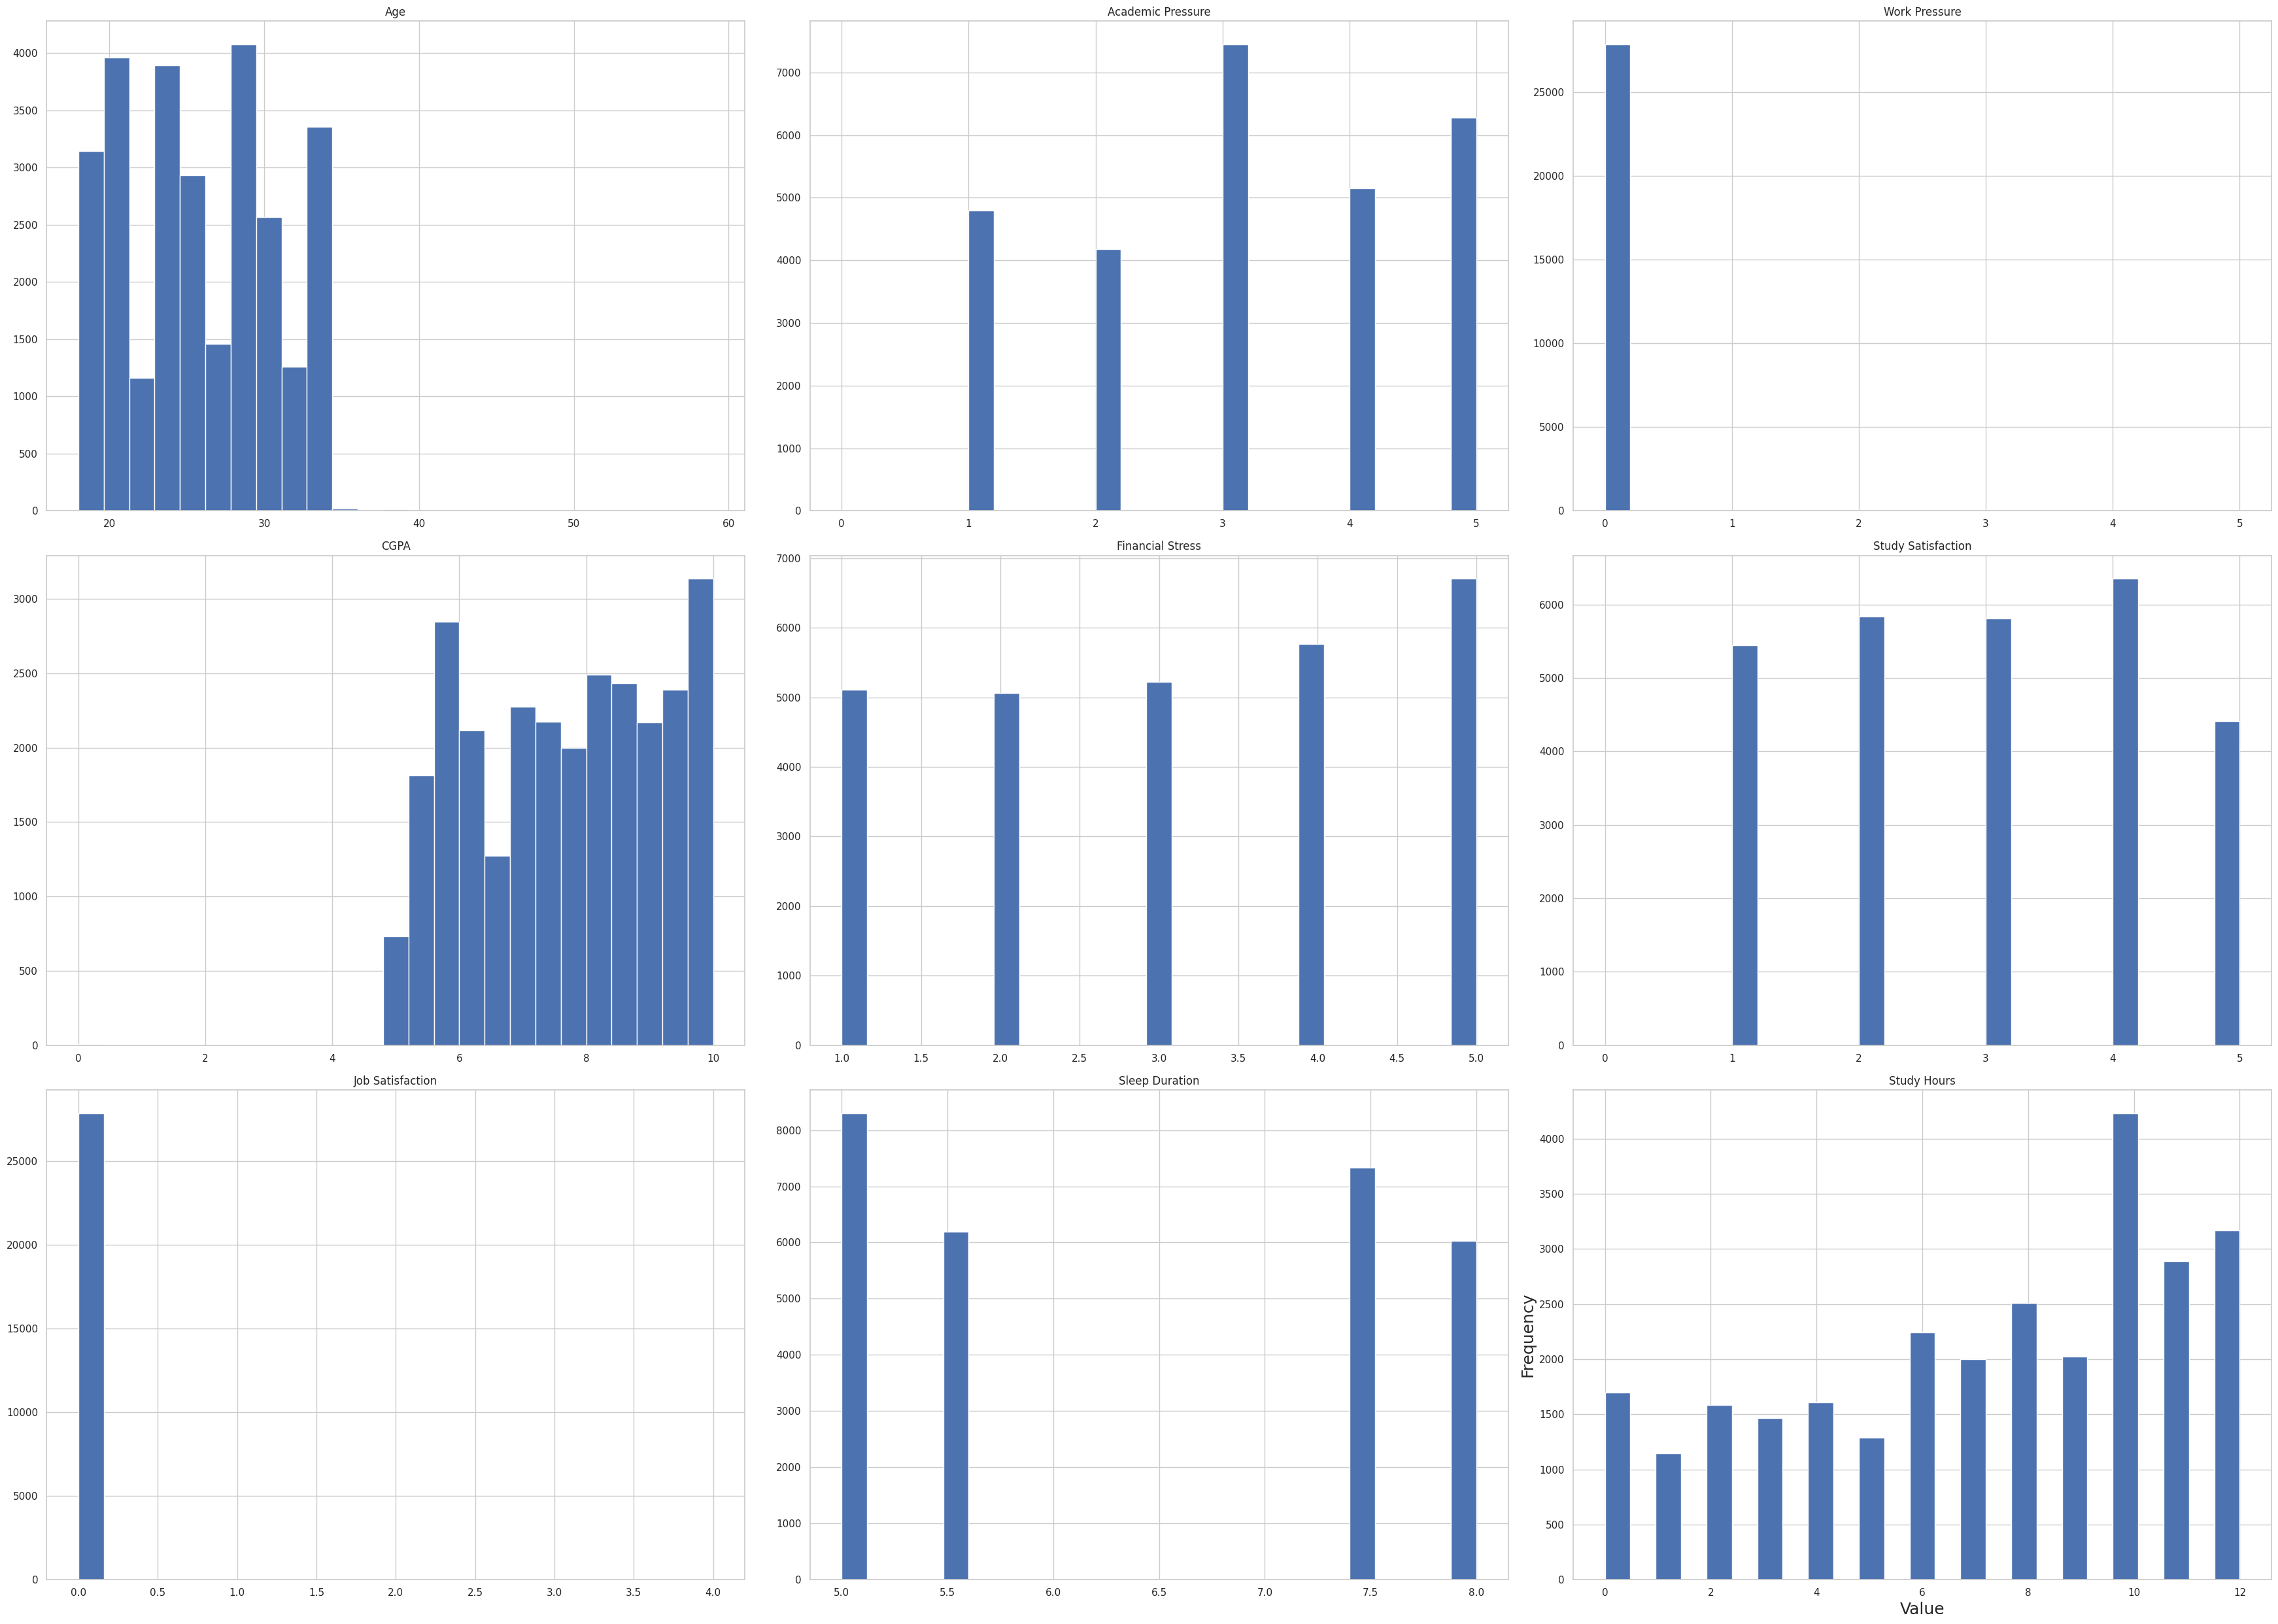

In [82]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Financial Stress',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Study Hours']
df[num_features].hist(bins=25, figsize=(35,25))
plt.xlabel("Value", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.subplots_adjust(top=1.2)  # Adjust the top to make room for the title
plt.tight_layout()  
plt.show()


 Job Satisfaction and Work Pressure have masive spike at 0, almost no other values and extremely left - skewed. Other features have sufficient spread across the range (not concentrates at extremes.), no exteme skewness that would hurt model performance.

### Correlation Heatmap

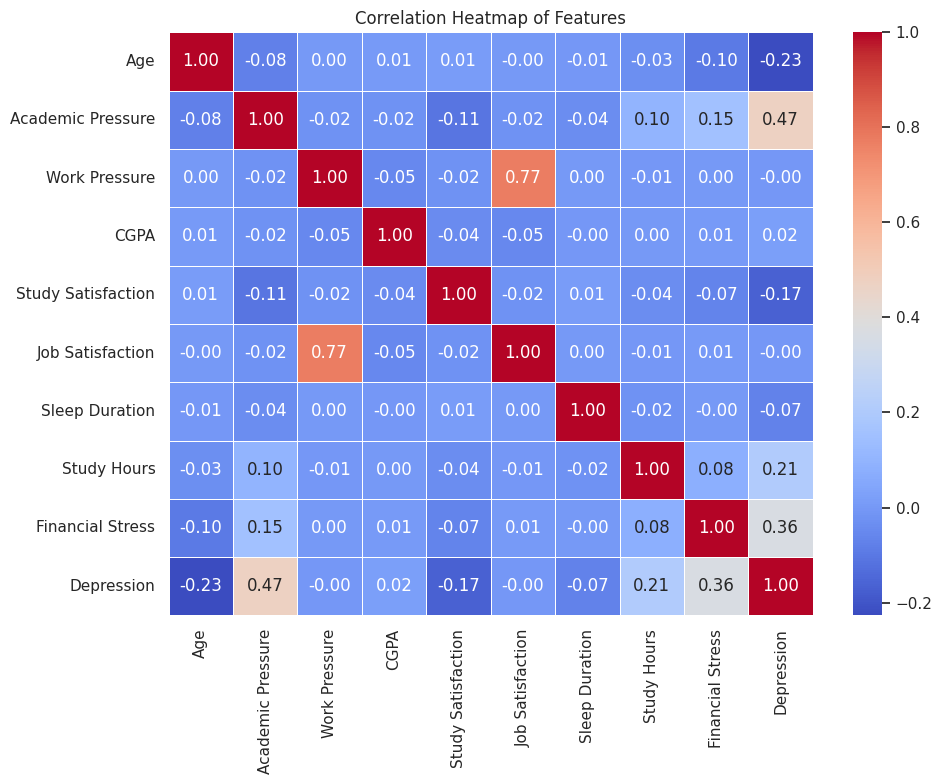

In [83]:
numerical_df=df.select_dtypes(include=['number'])
corr=numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

**Academic Pressure (0.47):** 
The strongest predictor of depression in this dataset. Higher academic pressure is moderately associated with increased depression risk.

**Financial Stress (0.36):**
Second strongest correlation. Financial difficulties show a meaningful positive relationship with depression.

**Work/Study Hours (0.21):**
Moderate positive correlation suggesting that longer work/study hours are associated with higher depression rates.

**Age (-0.23):**
Moderate negative correlation indicating younger individuals are more likely to experience depression in this dataset.

**Study Satisfaction (-0.17):**
Lower study satisfaction is associated with higher depression rates, though the relationship is relatively weak.

**Sleep Duration (-0.07):**
Weak negative correlation suggesting less sleep is slightly associated with depression.

**CGPA (0.02):**
Very weak correlation, suggesting academic performance itself isn't strongly linked to depression.

**Work Pressure (-0.00):**
Essentially no linear relationship with depression, which is interesting given that academic pressure shows a strong correlation.

**Job Satisfaction (-0.00):** 
No meaningful correlation, likely due to the skewed distribution noted earlier.

### Boxplot of Numerical Features

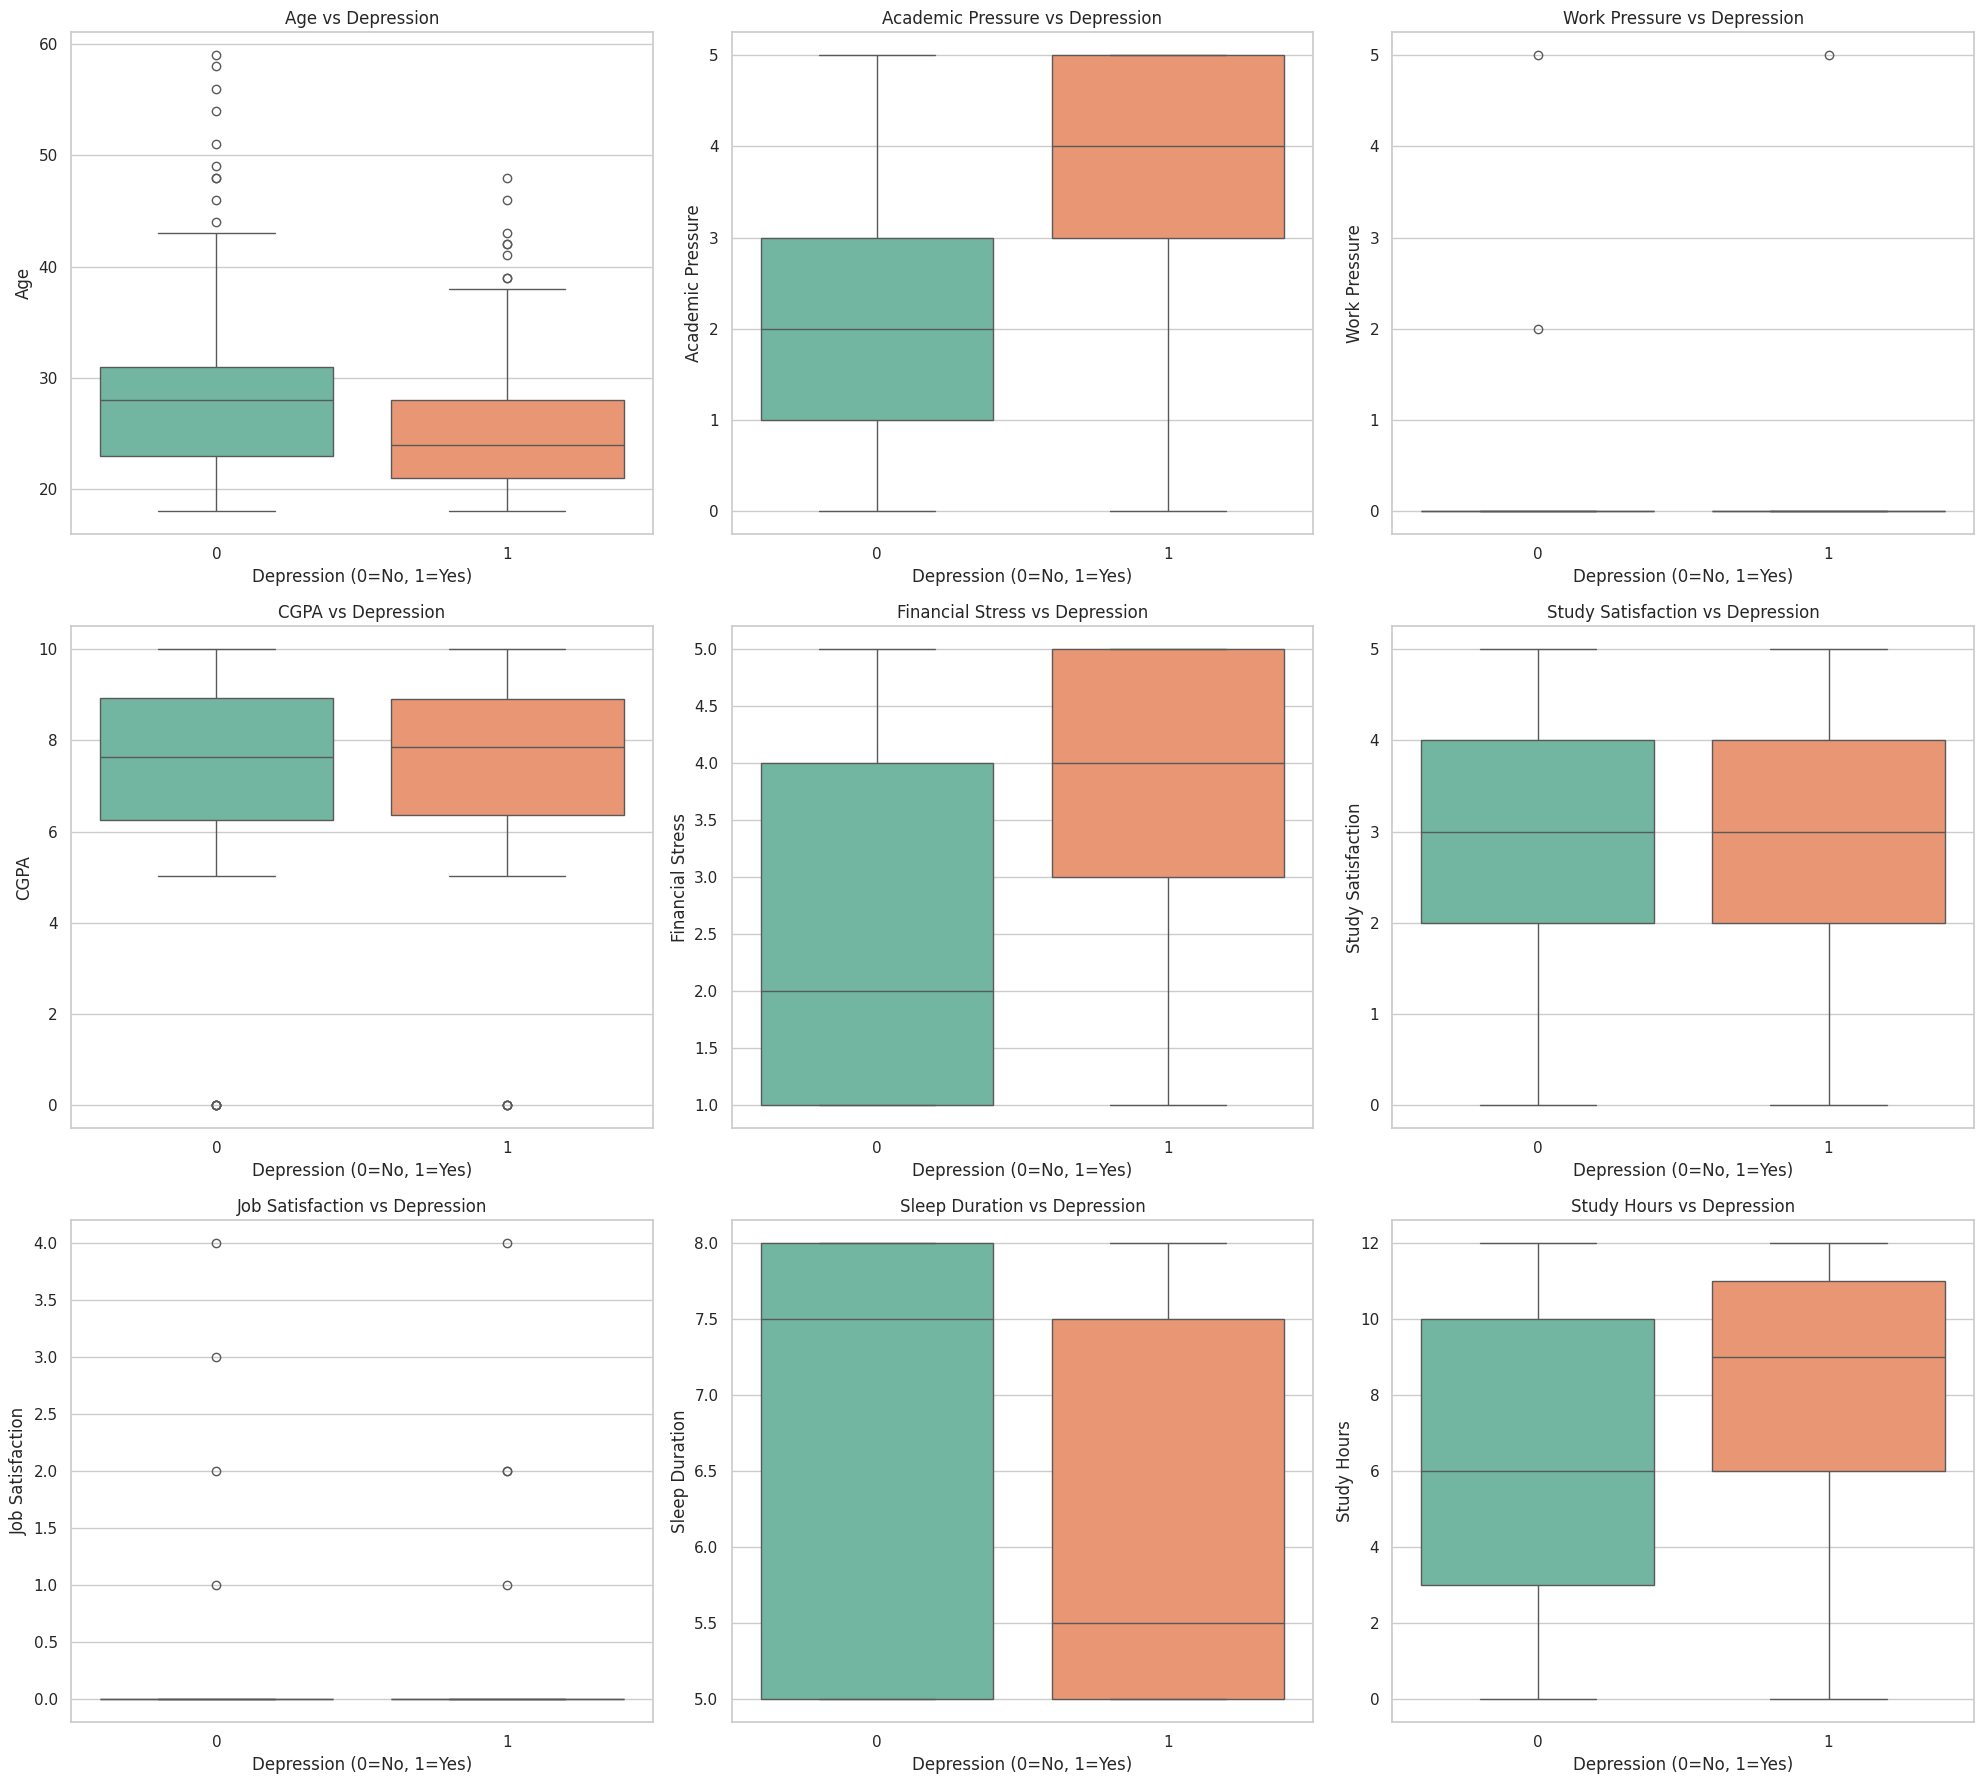

In [84]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Depression', y=feature, data=df, palette="Set2")
    plt.title(f"{feature} vs Depression")
    plt.xlabel("Depression (0=No, 1=Yes)")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

**Why drop Work Pressure and Job Satisfaction columns?**

In above boxplots of Work Pressure and Job Satisfaction show that they are randomly sacttered and few non - zero values are rare outliers. Because of this patteren and acording to the previous correlation heat map these features offer no meaningful predictive to the target variable.

In [85]:
df.drop(['Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

### Data Frame after completing cleaning and removing least relevant columns and rows

- The cleaned dataset (`df`) now contains **13 columns** and **27,889 rows**.
- Irrelevant columns such as `id`, `City`, `Profession`, `Work Pressure`, and `Job Satisfaction` have been dropped.
- All missing values have been handled, and only relevant features for depression analysis remain.
- The data types are optimized: categorical features use the `category` dtype, and numerical features are of type `float64` or `int64`.

**Current columns:**
- Gender (category)
- Age (float)
- Academic Pressure (float)
- CGPA (float)
- Study Satisfaction (float)
- Sleep Duration (float)
- Dietary Habits (category)
- Degree (category)
- Have you ever had suicidal thoughts? (category)
- Study Hours (float)
- Financial Stress (float)
- Family History of Mental Illness (category)
- Depression (int)



In [86]:
print("Columns after cleaning:", df.columns.tolist())
print("Dataset shape after cleaning:", df.shape)
df.info()

Columns after cleaning: ['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Dataset shape after cleaning: (27858, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27858 entries, 0 to 27857
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27858 non-null  category
 1   Age                                    27858 non-null  float64 
 2   Academic Pressure                      27858 non-null  float64 
 3   CGPA                                   27858 non-null  float64 
 4   Study Satisfaction                     27858 non-null  float64 
 5   Sleep Duration                         27858 non-null  float64 
 6   Dietary Habits             

In [87]:
print("DataFrame Dimensions")
print("------------------------")
print(f"   Rows   : {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")

DataFrame Dimensions
------------------------
   Rows   : 27858
   Columns: 13


### Save the Preprocessed Data Set

In [88]:
df.to_csv('Data/processed/FC110568_Dilini/preprocessed_data.csv', index=False)